# Live Coding Exercise for Web Scraping with BeautifulSoup

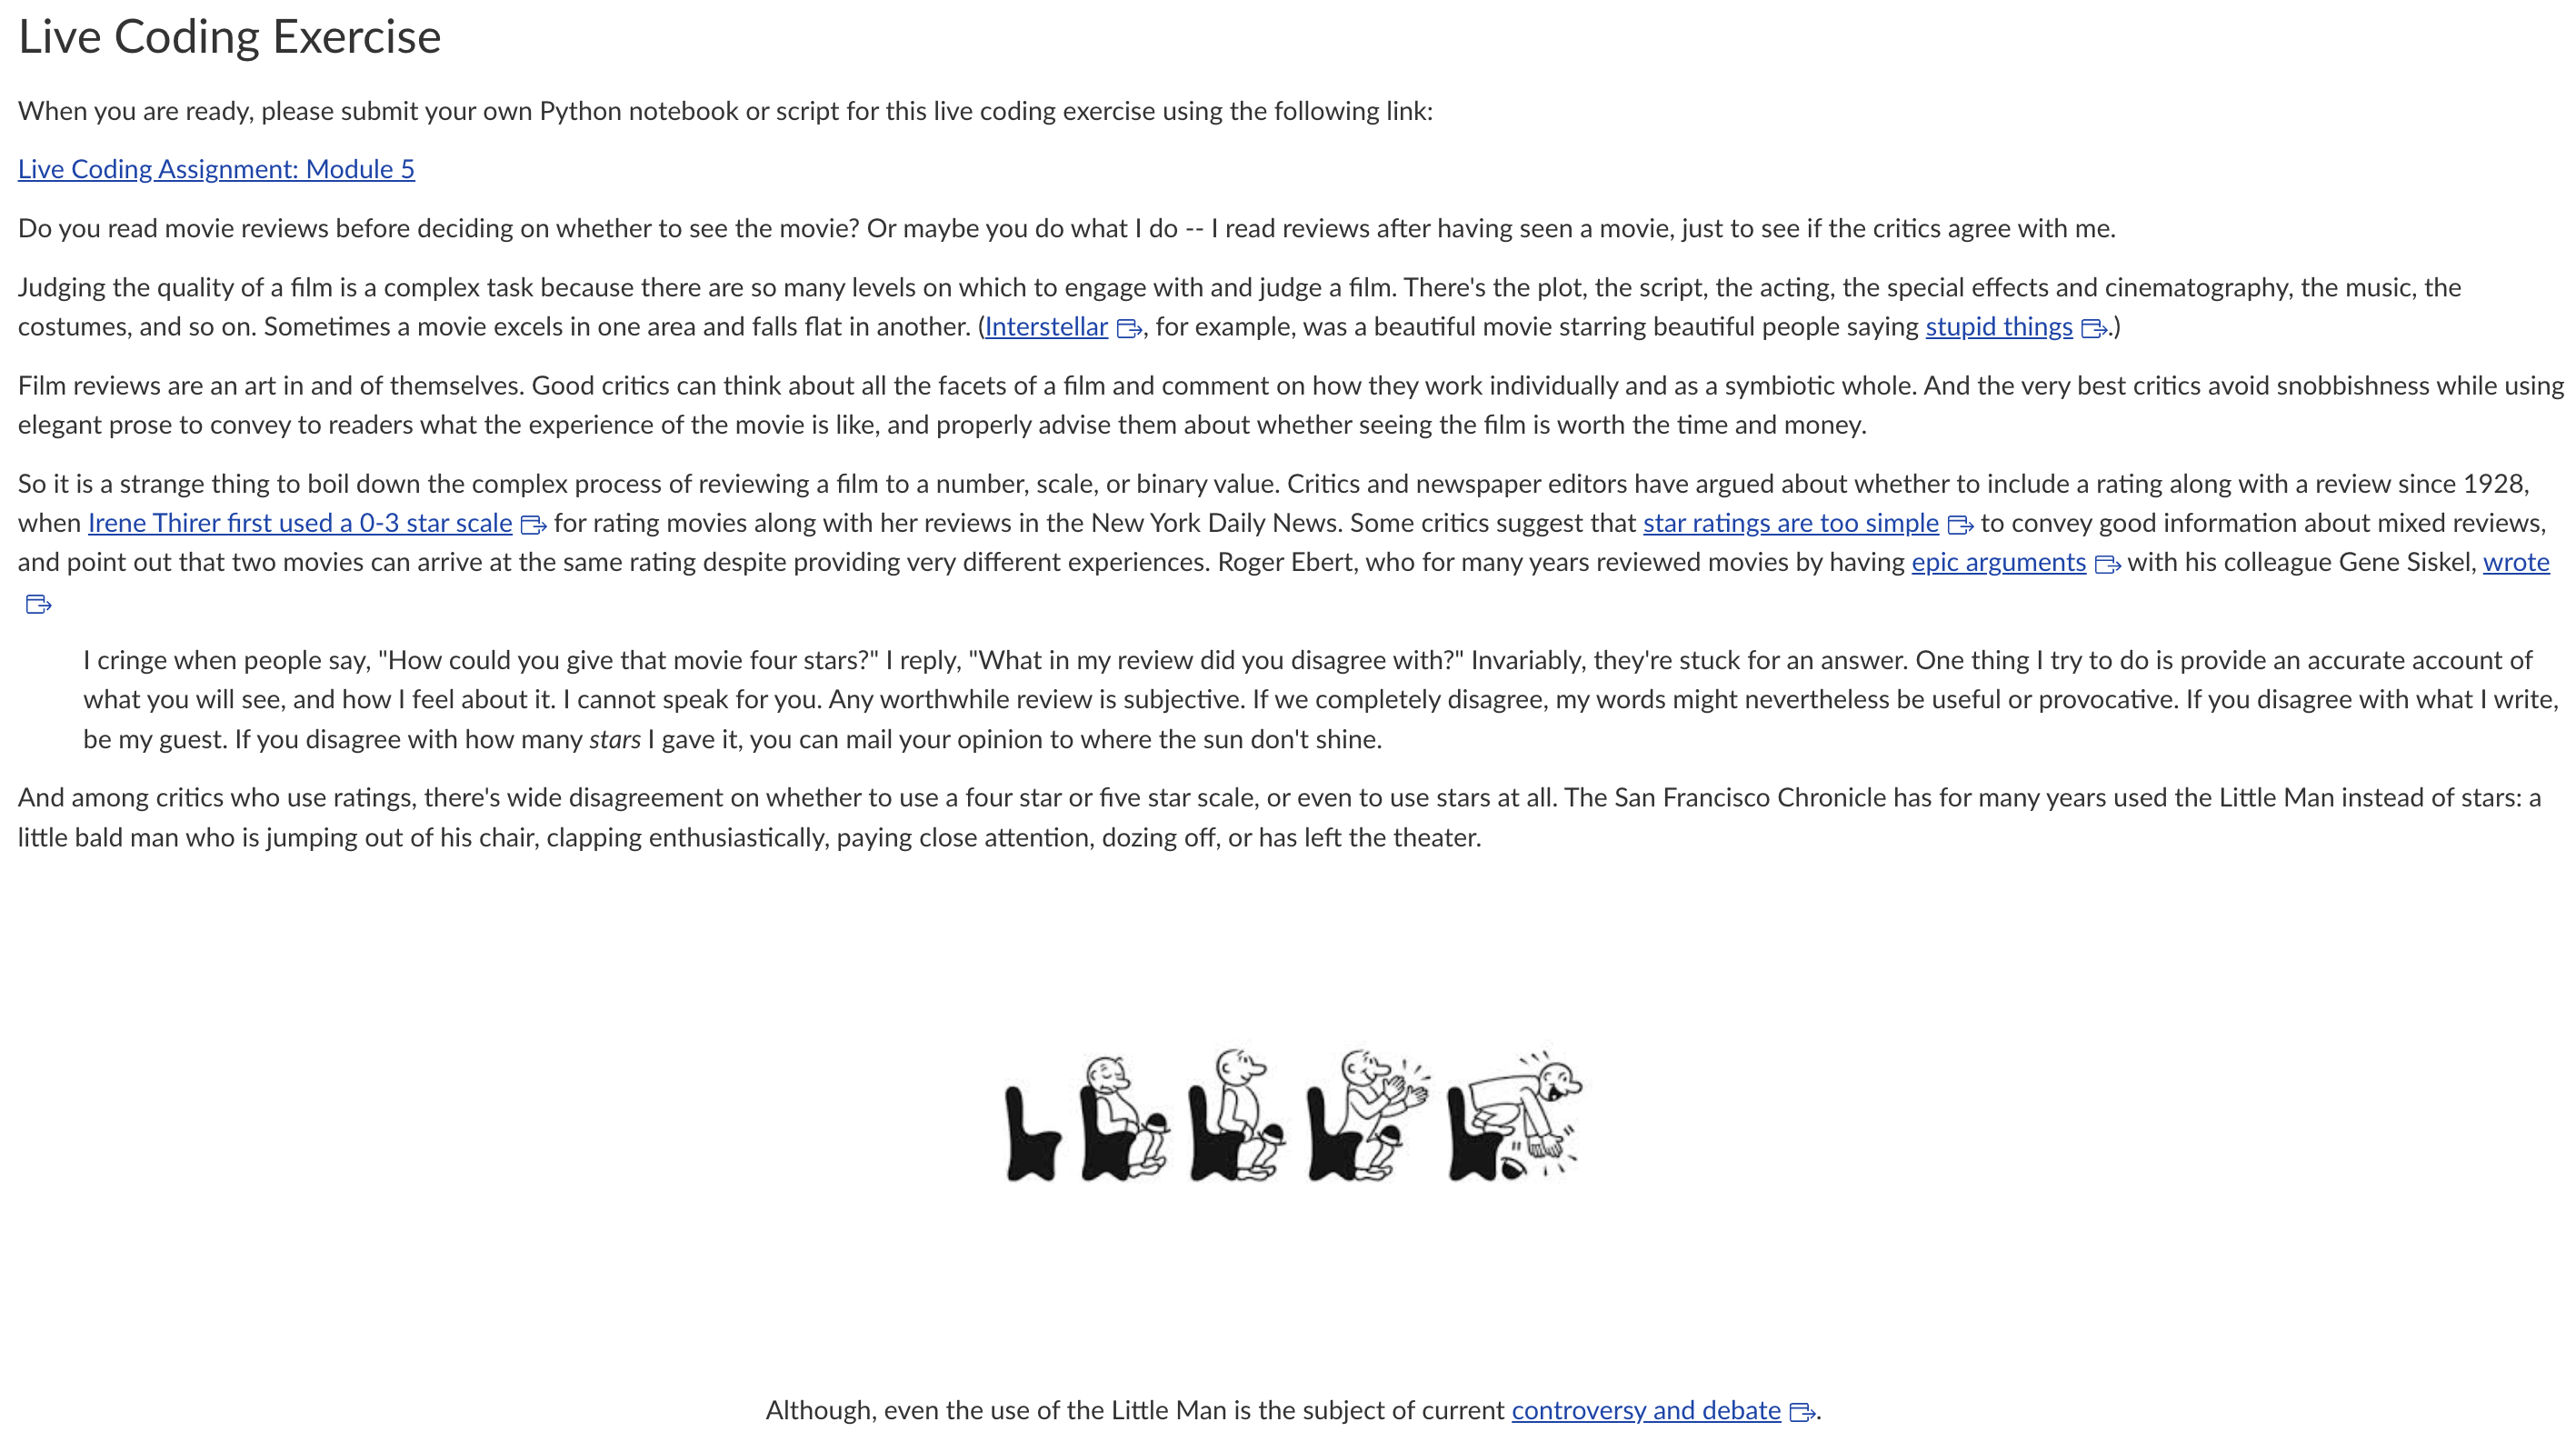

In [1]:
from IPython.display import Image
Image(filename="Prompt_For_Live_Coding_Exercise--1_of_2.PNG")

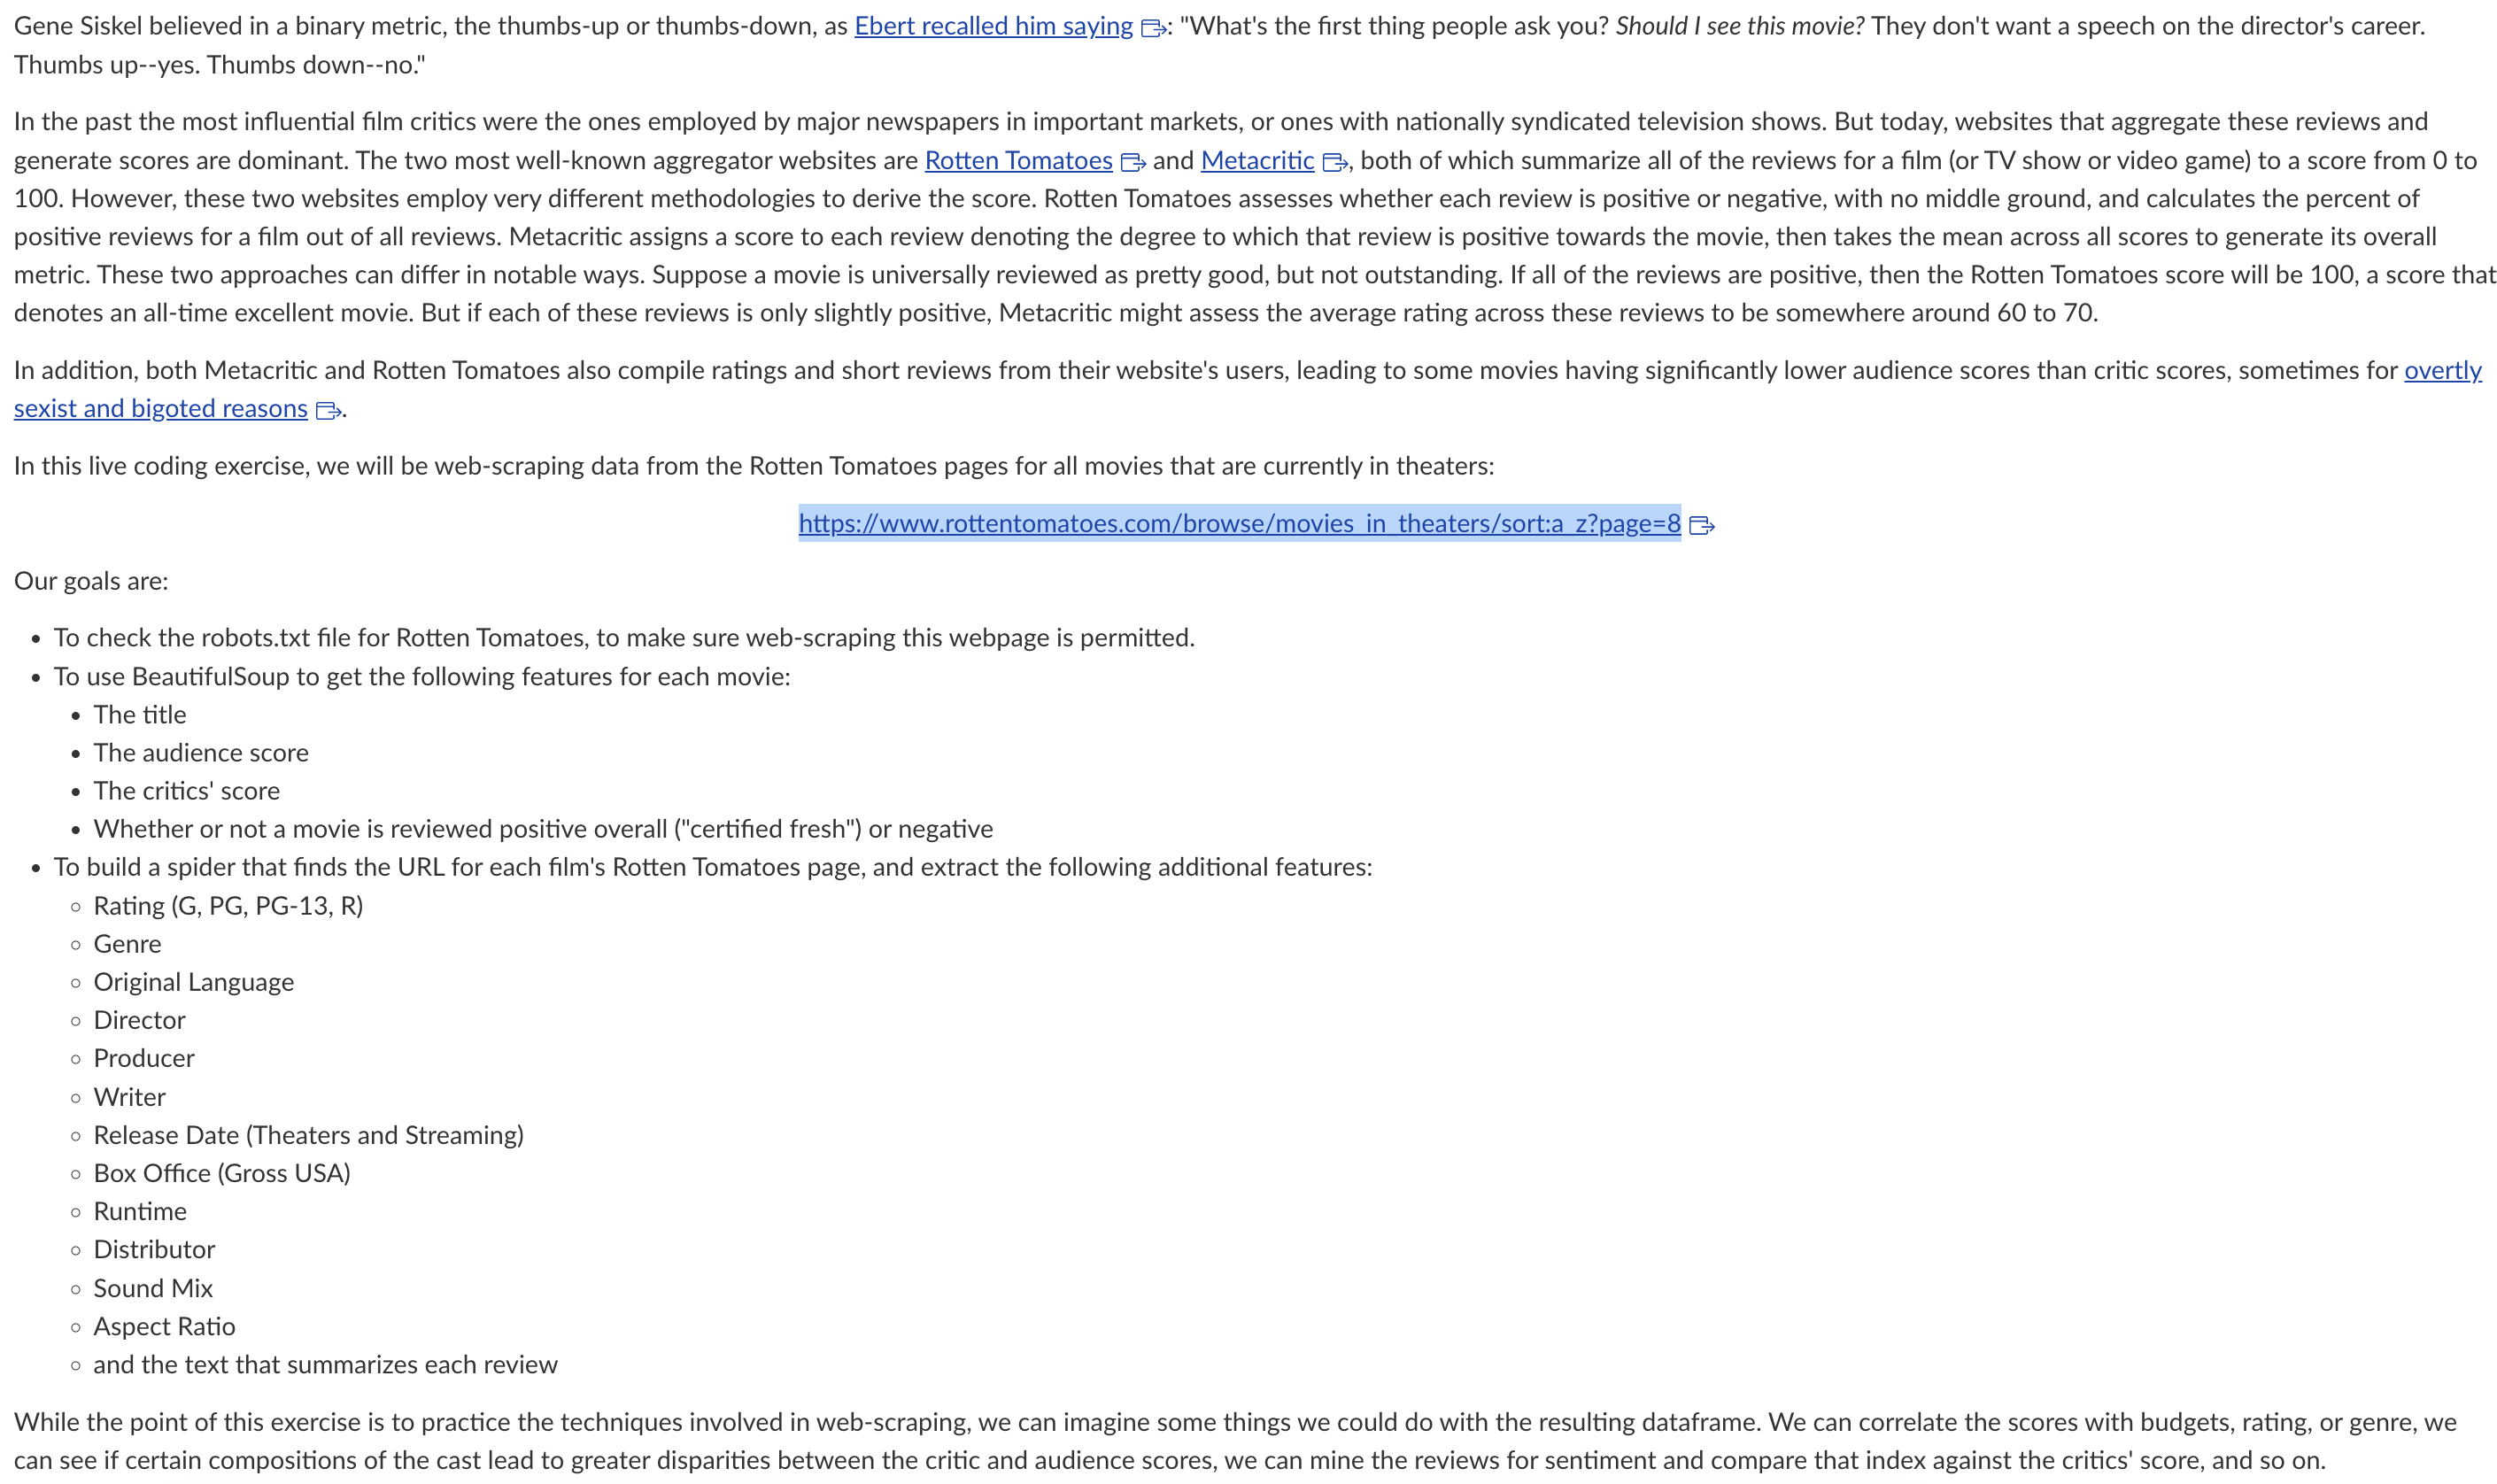

In [2]:
from IPython.display import Image
Image(filename="Prompt_For_Live_Coding_Exercise--2_of_2.PNG")

In [4]:
import json
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup

# Get our user-agent, specific to Python & requests

In [6]:
url = 'https://httpbin.org/user-agent'
r = requests.get(url)
useragent = json.loads(r.text)['user-agent']
useragent

'python-requests/2.28.1'

In [7]:
headers = {
    'User-agent': useragent,
    'From': 'tsl2b@virginia.edu'
}

In [8]:
url = 'https://www.rottentomatoes.com/browse/movies_in_theaters/sort:a_z?page=8'
r = requests.get(url, headers = headers)
r

<Response [200]>

In [11]:
myhtml = BeautifulSoup(r.text)

In [22]:
list_of_spans = myhtml.find_all('span', 'p--small')
list_of_anchors = myhtml.find_all('a', 'js-tile-link', href = True)
list_of_anchors[3].find('span', 'p--small').text.strip()

'A Radiant Girl'

In [24]:
[a.find('span', 'p--small').text.strip() for a in list_of_anchors][0:5]

['80 for Brady',
 '88',
 'A Man Called Otto',
 'A Radiant Girl',
 'All the Beauty and the Bloodshed']

In [27]:
[a.find('span', 'smaller').text.strip() for a in list_of_anchors][0:5]

['Opened Feb 03, 2023',
 'Opens Feb 17, 2023',
 'Opened Jan 13, 2023',
 'Opens Feb 17, 2023',
 'Opened Nov 23, 2022']

In [28]:
list_of_anchors[0].find('score-pairs')

<score-pairs audiencescore="89" audiencesentiment="positive" criticscertified="" criticsscore="61" criticssentiment="positive">
</score-pairs>

In [43]:
audience_scores = [a.find('score-pairs')['audiencescore'] for a in list_of_anchors]
audience_sentiment = [a.find('score-pairs')['audiencesentiment'] for a in list_of_anchors]
critics_certified = [a.find('score-pairs')['criticscertified'] for a in list_of_anchors]
critics_score = [a.find('score-pairs')['criticsscore'] for a in list_of_anchors]
critics_sentiment = [a.find('score-pairs')['criticssentiment'] for a in list_of_anchors]
df = pd.DataFrame({
    'audience_scores': audience_scores,
    'audience_sentiment': audience_sentiment,
    'critics_certified': critics_certified,
    'critics_score': critics_score,
    'critics_sentiment': critics_sentiment
})
df['audience_scores'] = df['audience_scores'].replace('', np.nan).astype(float)
df['critics_score'] = df['critics_score'].replace('', np.nan).astype(float)
df.corr()

,audience_scores,critics_score
audience_scores,1.000000,0.487053
critics_score,0.487053,1.000000
